# CMSE 802 In-class assignment: Matrix Solvers
## Date: 09/12/2018
## Due: 09/12/2018; 10:30 PM
### The goal of this assignment is to introduce basics of matrix operation and matrix solving techniques. We will also learn that a discretized differential equation can be converted to a matrix equation.

---
### Your name: Boyao Zhu

---
### Background
### 1D Heat equation

$$\frac{\partial T}{\partial t} = \frac{\kappa}{\rho C_p} \frac{\partial^2 T}{\partial x^2}.$$

At the steady state, $\partial T / \partial t = 0$, thus the differential equation need to be solved is $\partial^2 T / \partial x^2 = 0$, which is called the Laplace equation. 

Through discretization, the continous partial equation is converted (or approximated) to a matrix equation.

$$\frac{\partial^2 T}{ \partial x^2} = 0 ~~~~ \Longrightarrow ~~~~ \frac{T_{i-1} - 2T_{i} + T_{i+1}}{(\Delta x)^2} = 0 ~~~~ \Longrightarrow ~~~~\mathbf{A} \mathbf{u} = \mathbf{f} ,$$

where $\mathbf{A}$ is the operator matrix (in this case, it is the Laplacian operator), $\mathbf{u}$ is the unkown to be solve (it is in a form of vecotr), and $\mathbf{f}$ is the force vector.

The matrix equation is 

$$\frac{1}{(\Delta x)^2} \left[ \begin{array}{cccccccccccc} 
-2 &  1 &  0 &  0 & 0 & . & . & . & . & . & . & . \\
 1 & -2 &  1 &  0 & 0 & . & . & . & . & . & . & . \\
 0 &  1 & -2 &  1 & 0 & . & . & . & . & . & . & . \\
 0 &  0 &  1 & -2 & 1 & . & . & . & . & . & . & . \\
. & . & . & . & . & . & . & . & . & . & . & . \\
. & . & . & . & . & . & . & . & . & . & . & . \\
. & . & . & . & . & . & . & . & . & . & . & . \\
. & . & . & . & . & . & . & 1 & -2 &  1 &  0 &  0 \\
. & . & . & . & . & . & . & 0 &  1 & -2 &  1 &  0 \\
. & . & . & . & . & . & . & 0 &  0 &  1 & -2 &  1 \\
. & . & . & . & . & . & . & 0 &  0 &  0 &  1 & -2 \\
\end{array} \right] 
\left[ \begin{array}{c} T_1 \\ T_2 \\ T_3 \\ T_4 \\ . \\ . \\ . \\ . \\ T_{n-4} \\ T_{n-3} \\ T_{n-2} \\ T_{n-1}  \end{array} \right] =
\frac{1}{(\Delta x)^2} \left[ \begin{array}{c} - T_0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ - T_n \end{array} \right].$$

Note that $T_0$ and $T_n$ on the right hand side of the equation are the boundary values, and the temperature needs to be determined is $T_1$ through $T_{n-1}$. 

Solving the matrix equation will give us the numerical solution of the differential equation. 

---
### Part 1: Build a finite difference code to solve 1D Laplace equation (the steady state of Heat equation)
We want to estimate the **steady-state** temperature profile in the wall of a broiler made of steel. The thickness of the wall is 1 cm. Assuming that the wall is planar, meaning we can treat the heat transfer problem as a 1-dimensional problem along the thickness of the wall. We assume that when the broiler is fired up, the temperature of the combustion chamber rises rapidly to 400$^\circ$C, the temperature of the inner surface of the wall. The outer surface of the wall remains at constant 10$^\circ$C, in equilibrium with the environment temperature. 

<img src="Broiler_1.jpg",width=400, height=400 />

**(1) Discretization:** Use a set of discrete points to represent a continuum domain. For exmample, as in the figure below, $n+1$ grid points (labeled by 0 to $n$) are seeded in a 1D domain. For simplicity, we set grid spacing to be uniform, which is denoted as $\Delta x$. The temperature in this 1D domain is now represented by a set of discrete values, labeled by $T_0$ to $T_n$.
 
<img src="discr_1.jpg",width=600, height=400 />

**(2) Set boundary condition:** Here, the temperature at the boundaries are fixed. This type of boundary is called the **Dirichlet boundary condition**. In the discretization in the figure above, grid points 0 and $n$ are the grid points that boundary values will be imposed. $T_0 = 400$ and $T_n = 10$. We will only need to solve the temperature at grid points 1 through $n-1$.

**(3) Construct the operator matrix:** As demonstrated above, the Laplace equation can be converted to a matrix equation. Let's build the operator matrix for this problem. 

**(4) Solve the matrix equation:** We try test a couple of matrix solvers in this assignment.

### Direct matrix solver

**Task 1:** Let's build the operator matrix of the 1D Laplace equation for the problem stated above. As in the pre-class assignemnt, we can use linear algebra library to solve the matrix equation. **Solve the Laplace equation and plot the result**.  In addition to solving the equation, we want to **mark the computer time** needed for solving the equation.  

0.0007970333099365234


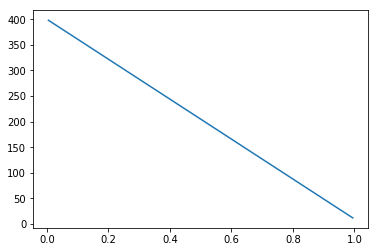

In [34]:
# load libraries
import numpy as np
import matplotlib.pyplot as plt
import time as tm

%matplotlib inline


# create a matrix
Am = np.zeros((199,199))

# create the vector for the unknowns
T = np.zeros(199)

# create the force vector
f = np.zeros(199)

# Boundary conditions
f[0] = -400
f[198] = -10

# fill the entries in the matrx
for n in range(199):
    
    # main diagonal
    Am[n,n] = -2
    
    # upper and lower diagonals
    if n > 0:
        Am[n-1,n] = 1
        Am[n,n-1] = 1


# walltime before matrix solving
cpu_tm_bg = tm.time()

# solve vector T
T = np.linalg.solve(Am,f)

# walltime after matrix solving
cpu_tm_ed = tm.time()
    
    
# plotting
Xp = np.linspace(0,1,201)
plt.plot(Xp[1:200],T)

# time for matrix solving
print(cpu_tm_ed - cpu_tm_bg)


**How long does the computer take to solve this equation?**

**Your answer:** 0.0007970333099365234

---
### Part 2: Iterative solver
### Jacobi method
Recall the pre-class assignment, the Jacobi method uses iterations to calculate the solution of a matrix equation: 

$\mathbf{x}^{(n+1)} = \mathbf{D}^{-1} (\mathbf{f} -  \mathbf{R} \mathbf{x}^{(n)})$,

where the superscript $(n)$ denotes the $n$-th iteration. The residual at each iteration step is 

$\mathbf{r}^{(n)} = \mathbf{f} - \mathbf{A} \mathbf{x}^{(n)}.$

** Task 2**
Now let's try solving the matrix equation for the 1D Laplace equation using the Jacobi method. Let's assume that the solution is accepted when the residual is less than 1.e-5. **Plot your result of the temperature profile. Plot the residual evolution during iteration**.   

92558 3.128168821334839 9.999639812168847e-06


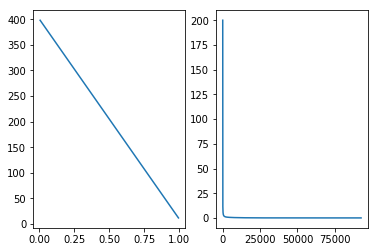

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import time as tm

%matplotlib inline


# copy the code for building matrix A from the previous cell to here
Am = np.zeros((199,199))
T  = np.zeros(199)
f  = np.zeros(199)

f[0]   = -400
f[198] = -10
    
for n in range(199):
    Am[n,n] = -2
    if n > 0:
        Am[n-1,n] = 1
        Am[n,n-1] = 1
        

# create matrices D and R
D = np.zeros((199,199))        
R = np.zeros((199,199)) 
# fill the entries in D and R
D = np.diag(np.diag(Am))

R = Am - D


# inverse of D matrix
Dinv = np.zeros((199,199))
# fill the entries in Dinv
Dinv = np.linalg.inv(D)
    
    
# Jacobi method
nrm = []

# walltime before matrix solving
cpu_tm_bg = tm.time()


# iteration
for iter in range(100000):
    
    # calculate T^(n+1) using matrix-vector operations
    T = np.matmul(Dinv,f-np.matmul(R,T))
    
    # calculate residual
    resd = f - np.matmul(Am , T)
    nrm.append(np.linalg.norm(resd,2))
    
    # set termination criterion
    if nrm[-1] < 1e-5:
        break
        
# walltime after matrix solving
cpu_tm_ed = tm.time()


print(iter, cpu_tm_ed - cpu_tm_bg, nrm[-1])
plt.subplot(1,2,1)

Xp = np.linspace(0,1,201)
plt.plot(Xp[1:200],T)

plt.subplot(1,2,2)
plt.plot(nrm)


**How many iterations does your code take to solve the matrix equation? What long does your computer solve the equation?**

**Your answer:** 92558 iterations are required.  Computing time is 3.128168821334839



### Point-wise Jacobi relaxation (matrix-free)

For the finite difference method, it is unnecessary to alway form the operator matrix in solving the PDEs. The iteration can be done at each grid point. Here, let's work on the point-wise Jacobi relaxation that allow us to solve our 1D Laplace equation without creating the operator matrix.

Recall the matrix equation for the Jacobi method. 

$$\mathbf{T}^{(n+1)} = \mathbf{D}^{-1} ( \mathbf{f} - \mathbf{R} \mathbf{T}^{(n)} ) $$

It is expended as 

$$\left[ \begin{array}{c} T_1 \\ T_2 \\ T_3 \\ T_4 \\ . \\ T_{n-4} \\ T_{n-3} \\ T_{n-2} \\ T_{n-1}  \end{array} \right]^{(n+1)} = 
\left[ \begin{array}{ccccccccc} 
-1/2 & 0 &  0 &  0 & . & . & . & . & . &  \\
 0 & -1/2 & 0 &  0 & . & . & . & . & . &  \\
 0 &  0 & -1/2 & 0 & . & . & . & . & . &  \\
 0 &  0 &  0 & -1/2 & . & . & . & . & .  \\
. & . & . & . & . & . & . & . & .  \\
. & . & . & . & . & -1/2 & 0 &  0 &  0 \\
. & . & . & . & . &  0 & -1/2 & 0 &  0 \\
. & . & . & . & . &  0 &  0 & -1/2 & 0 \\
. & . & . & . & . &  0 &  0 &  0 & -1/2 \\
\end{array} \right] 
\left( \left[ \begin{array}{c} - T_0 \\ 0 \\ 0 \\ 0  \\ . \\ 0 \\ 0 \\ 0 \\ - T_n \end{array} \right] - 
\left[ \begin{array}{ccccccccc} 
 0 &  1 & 0 &  0 & . & . & . & . & . &  \\
 1 &  0 & 1 &  0 & . & . & . & . & . &  \\
 0 &  1 & 0 &  1 & . & . & . & . & . &  \\
 0 &  0 & 1 &  0 & . & . & . & . & .  \\
. & . & . & . & . & . & . & . & .  \\
. & . & . & . & . &  0 &  1 &  0 &  0 \\
. & . & . & . & . &  1 &  0 &  1 &  0 \\
. & . & . & . & . &  0 &  1 &  0 &  1 \\
. & . & . & . & . &  0 &  0 &  1 &  0 \\
\end{array} \right] 
\left[ \begin{array}{c} T_1 \\ T_2 \\ T_3 \\ T_4 \\ . \\ T_{n-4} \\ T_{n-3} \\ T_{n-2} \\ T_{n-1}  \end{array} \right]^{(n)} \right).$$

Let's pick the local equation at each grid, we can notice that

$$T_1^{(n+1)} = \frac{0 - (T_0^{(n)} + T_2^{(n)})}{-2} $$

$$T_2^{(n+1)} = \frac{0 - (T_1^{(n)} + T_3^{(n)})}{-2} $$

$$T_3^{(n+1)} = \frac{0 - (T_2^{(n)} + T_4^{(n)})}{-2} $$

$$.....$$
$$.....$$

$$T_{n-2}^{(n+1)} = \frac{0 - (T_{n-3}^{(n)} + T_{n-1}^{(n)})}{-2} $$

$$T_{n-1}^{(n+1)} = \frac{0 - (T_{n-2}^{(n)} + T_{n}^{(n)})}{-2} $$

As a result, the Jacobi method is simply breaking down the stencil for the 2nd derivative by moving the values of the two neighboring points to the right hand side, and use them to calculate the new value of the center point:

$$\frac{T_{i-1} - 2T_{i} + T_{i+1}}{(\Delta x)^2} = 0 ~~~~\Longrightarrow~~~~ T_{i}^{(n+1)} = 0 - \frac{T_{i-1}^{(n)} + T_{i+1}^{(n)}}{-2}$$

**Task 3:** Let's use point-wise Jacobi relaxation method to solve the same 1D Laplace equation. Compare the results from point-wise relaxation to that from matrix iteration. 

44828 10.809462070465088 9.99957106802102e-06


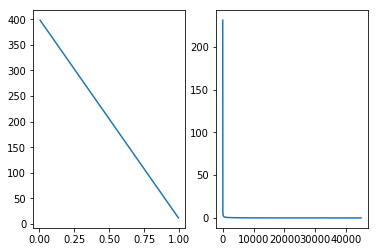

In [50]:
# Matrix-free Jacobi

import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline

import time as tm

# spatial discretization
gpt = 201
Xp = np.linspace(0,1,201)

T = np.zeros(gpt)*0
T_old = np.zeros(gpt)


# boundary condition
T[0] = 400
T[gpt-1] = 10 

# residual
resd = np.zeros(gpt-1)

nrm = []

# walltime before iteration
tbg = tm.time()

# iteration
cnt = 1
for iter in range(100000):

    T_old[0:gpt] = T[0:gpt]
 
    # calculate the value of T based on its two neighbors
    for i in range(1,gpt-1):
        T[i] = (T[i-1] + T[i+1])/2

        
    # calculate the residual        
    for i in range(1,gpt-1):
        resd[i] = T_old[i] - T[i]
    
    # norm of residual
    nrm.append(np.linalg.norm(resd[1:gpt-1],2))
    

    if nrm[-1] < 1.0e-5:
        break

# walltime after iteration        
ted = tm.time()

# print results
print(iter,ted-tbg,nrm[-1])

plt.subplot(1,2,1)
plt.plot(Xp[1:200],T[1:200])

plt.subplot(1,2,2)
plt.plot(nrm)



**How many iterations does your code take to solve the matrix equation in poit-wise relaxation? What long does your computer solve the equation? Do you get identical result as in the matrix-iteration Jacobi method?**

**Your answer:** 44828 iterations are required for the matrix equation in point-wise relaxation.  Computing time is 10.809462070465088.  Yes, I did get the identical result as in previous case.

---
### Part 3: implicit time scheme
Our last activity for today's in-class assignment is to solve the 1D Heat equation with a fully implicit scheme.

To avoid wasting heat, an insulation layer has been placed to cover the broiler. We assume that no heat flux will leak from the outer surface. In the modeling aspect, this will change the boundary condition at the outer surface. Let's change it to a no-flux boundary condition, meaning **the gradient between the outer most grid and ghost grid becomes zero**. 

No-flux boundary condition is a type of Neumann boundary condition. A **Neumann boundary condition** describes the gradient of field variables at the boundary.

<img src="Broiler_2.jpg",width=400, height=400 />

**Task 4:** (1) Build an operator matrix for the 1D heat equation with a no-flux boundary condition at the outer wall surface. (2) Build an operator matrix for the fully implicit time scheme. (3) Simulation the temperature evolution up to 10 second. We will the time step 30 times that of the maximum stable time step size in the Euler's explicit time scheme.

Material properties of steel: thermal conductivity is 50.2 W/m; heat capacity is 510.8 J/(kg$\cdot$K); density is 7.85 g/cm$^3$. <strong>IMPORTANT!! Please make sure to convert all the units to be consistent.</strong> 

1.1117050647735596


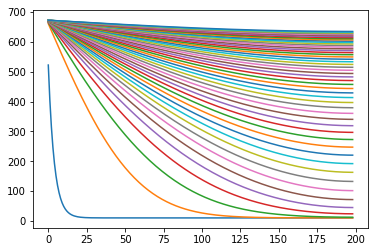

In [41]:
# load library
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time as tm

# material parameters
kap = 50.2/1.0e2
Cp = 510.8/1.0e3
rho = 7.85

# spatial discretization
Xp = np.linspace(0,1,201)
dx = Xp[2]-Xp[1]

# maximum time step size in explicit scheme
dt0 = 0.5*(dx**2)/kap*(rho*Cp)

# 30 times larger time step size
dt = dt0*30

# parameter
alp = kap/(rho*Cp) / dx**2 *dt

# (1)
# create matrix A
# copy the code for building matrix A from the previous cell to here
Am = np.zeros((199,199))
for n in range(199):
    Am[n,n] = -2
    if n > 0:
        Am[n-1,n] = 1
        Am[n,n-1] = 1


# no-flux BC at the outer wall surface
Am[198,198] = -1
 

# (2)
# operator matrix for implicit time scheme        
Mtrx = np.identity(199) - alp * Am


# create the vector for the unknowns
T = np.ones(199)*10




# create the force vector
f = np.zeros(199)


# time stepping
mytime = 0.
cnt = 0
tbg = tm.time()
for iter in range(15000):
    
        # set the force vector
        f[0:199] = T
        
        
        # booundary condition for grid 1
        f[0] = f[0] + (673*alp)
        
        # think about the boundary condition for grid 199; do we need to do anaything?
        #f[-1] = f[-2]
        
        # solve vector for T
        
        T = np.linalg.solve(Mtrx, f)
        
        # update time
        mytime = mytime + dt
        
        # plotting
        if mytime > cnt*0.2:
            cnt = cnt + 1
            plt.plot(T)
            
        # terminate simulation at simulation time = 10. s    
        if mytime > 10.0:
            break
ted = tm.time()
print (ted - tbg)
            


**Task 5: In Day03 in-class assginemnt, we have simulated the same temperature evolution using Euler explicit time scheme.  Our last task today is to compare the computer times between the two methods. Use the time function in the assignment earlier to record computer running time for the implicit and explicit time schemes.**

35.42628192901611


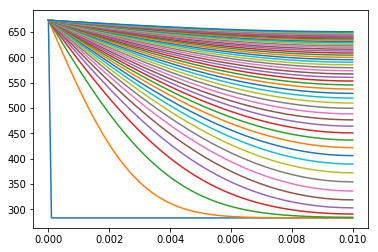

In [46]:
# Copy your Euler time scheme code in Day03 in-class assignment Part 3 to here and modify the code 
# to simulate temperature evolution for 10 s

# load module
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
import time as tm


# material parameters
kap   = 50.2
Cp    = 510.8
rho   = 7.85e3
coeff = kap/(rho*Cp)

# simulation parameter
gp = 201

# spatial discretization
Xp = np.linspace(0,0.01,gp)  # <== fill the blank
dx = Xp[2]-Xp[1]

# set time step size
t = 0.0
dt = dx**2/(2*coeff)   # <== fill the blank

# initial condition
T = 283.0*np.ones(gp+1)  # <== fill the blank

# boundary conditions
T[0]   = 673.0    # <== fill the blank

# time iteration

cnt = 0
a = 0
for i in range(gp):
    a += T[i]**2
norm.append(a)

tbg = tm.time()
for iter in range(150000):
    
    # elapsed time
    t = t + dt
    
    temp = []
    # calculate the Laplace at each grid point using for loop and update temperature at each grid point
    for i in range(1,201):
        a = coeff * (T[i-1] + T[i+1] - 2*T[i]) * dt / (dx**2) + T[i]
        temp.append(a)
    
    for i in range(1,201):
        T[i] = temp[i-1]
    
    T[-1]=T[-3]
    

    
    # plot the temperature profile every 0.2 sec
    if t > cnt*0.2:
        cnt = cnt + 1
        plt.plot(Xp,T[0:gp],'-')
    
    # stop time iteration when reaching 20 sec    
    if t > 10.0:
        break
ted = tm.time()

print (ted - tbg)



**What are the CPU times for the implicit and explicit schemes? **

**Your answer:** Implicit: 1.1117050647735596
                 Explicit: 35.42628192901611

---
## Here in the implicit time scheme, we use a direct matrix solver. For 1D cases, tri-diagonal matrix solver is very fast. However, in multi-dimensional cases, often point-wise relaxation schemes are faster. Which type of matrix solvers should be used truely depends on the nature of the problem.

### Congratulations, we're done!

** Don't forget to add your names to the top!!**

Log into the course D2L website (d2l.msu.edu) and go to "Assessments > Assignments > In-class Assignment 20180911".

In [ ]:
Well Done!